# 如何用Python探索星體在不同電磁波段下的樣貌？
此notebook為[《資料視覺化：用Python為星空作畫》](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出(在寫書期間，我原本宣傳的書名為《用Python探索天文：從資料取得到視覺化》，後應出版社要求改為現名）。我會持續透過創作故事、遊戲等有趣體驗來向大眾推廣開放科學，歡迎你加入「[Astrohackers-TW: Python在天文領域的應用](https://www.facebook.com/groups/astrohackers.tw.py)」FB社團，並追蹤我的[Threads](https://www.threads.net/@astrobackhacker)。

## 多波段天文觀測
多波段天文觀測能揭露不同星體的特徵或是同個星體的多種樣貌。像紅外線，它可以讓我們研究那些因溫度較低主要輻射集中在紅外線的星體，或是隱藏在星際塵埃中的恆星形成區。除了紅外線，無線電波也可以穿透星際塵埃，透過觀測分子雲讓我們了解恆星形成。再來，有一種快速旋轉的中子星，會發射出規律的無線電脈衝訊號，稱為脈衝星。觀測這種星體發出的無線電波輻射，可以了解脈衝星的自轉週期及磁場特性。還有，有些星系核心非常活躍，會從兩極噴射出電漿噴流，透過無線電波望遠鏡的觀測，可以了解這些噴流的結構及形成機制。至於X射線，它通常與宇宙中劇烈的高能現象有關，如黑洞、中子星或白矮星等星體在吸引累積周圍物質時，會將這些物質加熱到極高溫度，進而輻射出高能量的X射線。透過X射線望遠鏡的觀測，我們可以研究這些高溫物質的結構，或間接證明黑洞的存在。

[Astroquery](https://astroquery.readthedocs.io/en/latest/)是一個能串接不同天文資料庫服務以方便取得各種天文資料的Python套件。它提供多個模組，用於查詢不同波段的天文資料庫服務。

In [ ]:
# 安裝所需套件
!pip install -U --pre astroquery
!pip install astropy[all] --upgrade

## 範例1：用Astroquery連接到IRSA資料庫，取得廣域紅外線巡天探測衛星對M42拍攝的紅外線影像
IRSA(NASA/IPAC Infrared Science Archive)是一個專門存儲和提供各種紅外線天文資料的資料庫，其中包含廣域紅外線巡天探測衛星(Wide-field Infrared Survey Explorer, WISE)的觀測資料。M42又稱為獵戶座大星雲，是一個最接近地球的恆星形成區。

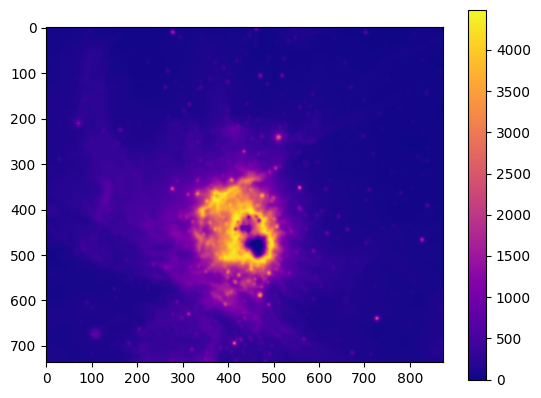

In [1]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.ipac.irsa import Irsa
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt

# 設定M42星雲的座標
m42_coords = SkyCoord.from_name('M42')
# 設定要查詢的半徑大小
radius = 1 * u.arcmin
# 從IRSA資料庫查詢WISE的影像
wise_images = Irsa.query_sia(pos=(m42_coords, radius), collection='wise_allwise').to_table()
# 篩選出科學影像類型的資料
science_image = wise_images[wise_images['dataproduct_subtype'] == 'science'][2]

# 使用Astropy開啟FITS檔讀取影像資料，並建立一個以M42為中心、20弧分大小的剪裁區
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
  cutout = Cutout2D(hdul[0].section, position=m42_coords, size=20 * u.arcmin, wcs=WCS(hdul[0].header))

# 顯示影像
plt.imshow(cutout.data, cmap='plasma')
plt.colorbar()
plt.show()

## 範例2：用Astroquery連接到ALMA資料庫，取得阿塔卡瑪大型毫米及次毫米波陣列對M87拍攝的無線電波影像
阿塔卡瑪大型毫米及次毫米波陣列(Atacama Large Millimeter/submillimeter Array, ALMA)是位於智利阿塔卡瑪沙漠的電波望遠鏡陣列，專門觀測星體在毫米和次毫米波長的特徵。M87又稱為室女A星系，是一個巨大的橢圓星系，位於室女星系團中，它以其中心的超大質量黑洞和從核心噴射出的巨大噴流而聞名。

In [2]:
from astroquery.alma import Alma

# 初始化ALMA資料查詢物件
alma = Alma()
alma.archive_url = 'https://almascience.eso.org'

# 查詢M87的觀測資料表並以Pandas的dataframe格式顯示
m87_data = alma.query_object('M87')
m87_data.to_pandas()

,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,collections,target_name,s_ra,...,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,lastModified
0,ADS/JAO.ALMA#2012.1.00661.S,ALMA,JAO,ALMA,uid://A002/X6444ba/X1b4.source.M87.spw.17,cube,2,,M87,187.705931,...,Molecular Distribution in the Central Region o...,"Ray, Mahitosh","Ray, Mahitosh; Hwang, Chorng-Yuan",The central region of M87 has been observed by...,2024,The archetypal giant elliptical galaxy at the ...,M87_B7_12m,"Leonardo, elvira; Fernandes, Cristina; Bronfma...",1.105080,2024-08-21T18:10:02.819
1,ADS/JAO.ALMA#2012.1.00661.S,ALMA,JAO,ALMA,uid://A002/X6444ba/X1b4.source.M87.spw.19,image,2,,M87,187.705931,...,Molecular Distribution in the Central Region o...,"Ray, Mahitosh","Ray, Mahitosh; Hwang, Chorng-Yuan",The central region of M87 has been observed by...,2024,The archetypal giant elliptical galaxy at the ...,M87_B7_12m,"Leonardo, elvira; Fernandes, Cristina; Bronfma...",1.103594,2024-08-21T18:10:02.819
2,ADS/JAO.ALMA#2012.1.00661.S,ALMA,JAO,ALMA,uid://A002/X6444ba/X1b4.source.M87.spw.21,image,2,,M87,187.705931,...,Molecular Distribution in the Central Region o...,"Ray, Mahitosh","Ray, Mahitosh; Hwang, Chorng-Yuan",The central region of M87 has been observed by...,2024,The archetypal giant elliptical galaxy at the ...,M87_B7_12m,"Leonardo, elvira; Fernandes, Cristina; Bronfma...",1.186151,2024-08-21T18:10:02.819
3,ADS/JAO.ALMA#2012.1.00661.S,ALMA,JAO,ALMA,uid://A002/X6444ba/X1b4.source.M87.spw.23,image,2,,M87,187.705931,...,Molecular Distribution in the Central Region o...,"Ray, Mahitosh","Ray, Mahitosh; Hwang, Chorng-Yuan",The central region of M87 has been observed by...,2024,The archetypal giant elliptical galaxy at the ...,M87_B7_12m,"Leonardo, elvira; Fernandes, Cristina; Bronfma...",1.149293,2024-08-21T18:10:02.819
4,ADS/JAO.ALMA#2013.1.00073.S,ALMA,JAO,ALMA,uid://A001/X12f/X20f.source.M87.spw.17,image,2,ari_l,M87,187.705931,...,Molecular Distribution in the Central Region o...,"Fujita, Yutaka Ray, Mahitosh","Fujita, Yutaka; Izumi, Takuma; Nagai, Hiroshi;...",The central region of M87 has been observed by...,2024,We propose to search for CO(J=2-1) line emissi...,M87_a_06_TC,"Beuther, Henrik; Koda, Jin; Blackman, Eric; Wa...",0.700397,2024-08-21T18:10:02.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,ADS/JAO.ALMA#2022.1.01487.S,ALMA,JAO,ALMA,uid://A001/X35f5/X539.source.M87.spw.20,image,2,,M87,187.705931,...,,,,,<NA>,The Event Horizon Telescope (EHT) observations...,M87_m_06_7M,"Fish, Vincent; Fomalont, Ed; Fromm, Christian;...",14.801558,2024-08-21T18:10:02.819
249,ADS/JAO.ALMA#2022.1.01487.S,ALMA,JAO,ALMA,uid://A001/X35f5/X645.source.M87.spw.8,image,2,,M87,187.705931,...,,,,,<NA>,The Event Horizon Telescope (EHT) observations...,M87_a_05_7M,"Fish, Vincent; Fomalont, Ed; Fromm, Christian;...",15.146320,2024-08-21T18:10:02.819
250,ADS/JAO.ALMA#2022.1.01487.S,ALMA,JAO,ALMA,uid://A001/X35f5/X645.source.M87.spw.10,image,2,,M87,187.705931,...,,,,,<NA>,The Event Horizon Telescope (EHT) observations...,M87_a_05_7M,"Fish, Vincent; Fomalont, Ed; Fromm, Christian;...",15.194594,2024-08-21T18:10:02.819
251,ADS/JAO.ALMA#2022.1.01487.S,ALMA,JAO,ALMA,uid://A001/X35f5/X645.source.M87.spw.4,image,2,,M87,187.705931,...,,,,,<NA>,The Event Horizon Telescope (EHT) observations...,M87_a_05_7M,"Fish, Vincent; Fomalont, Ed; Fromm, Christian;...",13.820863,2024-08-21T18:10:02.819


In [3]:
import numpy as np

# 從上方的觀測資料表中選取其中一個觀測編號，並列出與該筆觀測相關的FITS檔網址
uids = np.unique(m87_data['member_ous_uid'])
uids = uids[uids.data == 'uid://A001/X35f4/X11f']
uid_url_table = alma.get_data_info(uids, expand_tarfiles=True)
fits_urls = [url for url in uid_url_table['access_url'] if '.fits' in url]
fits_urls

['https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw16.mfs.I.mask.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw16.mfs.I.pb.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw16.mfs.I.pbcor.fits',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw18.mfs.I.mask.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw18.mfs.I.pb.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw18.mfs.I.pbcor.fits',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw20.mfs.I.mask.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw20.mfs.I.pb.fits.gz',
 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.J1254p1141_ph.spw20.mfs.I.pbcor.fits',
 'https://alm

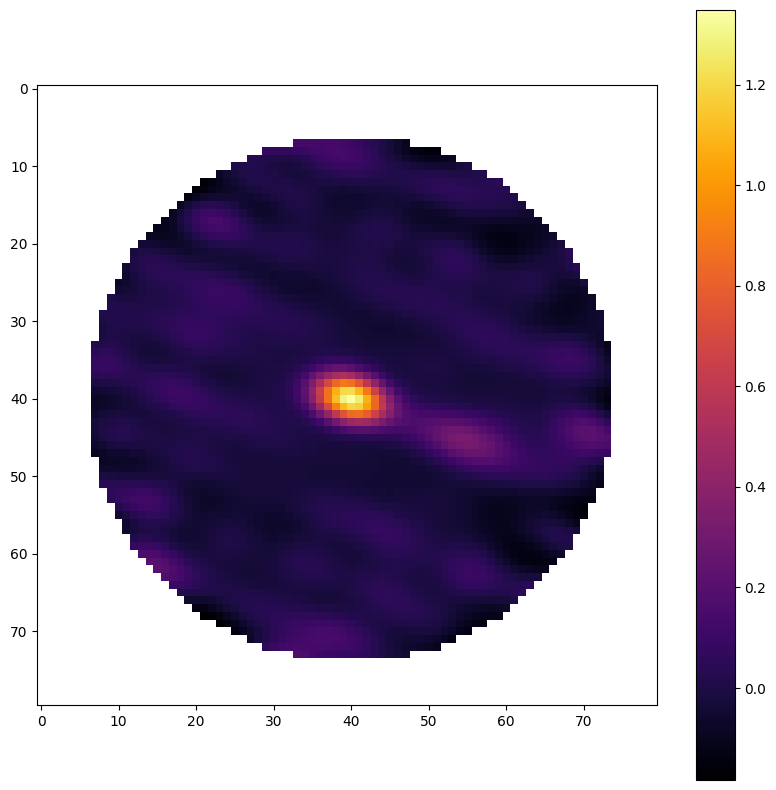

In [4]:
from astropy.utils.data import download_file
from astropy.io import fits
import matplotlib.pyplot as plt

# 從上方的FITS檔網址列表中選定其中一個下載
url = 'https://almascience.eso.org/dataPortal/member.uid___A001_X35f4_X11f.M87_sci.spw16_18_20_22.cont.I.pbcor.fits'
path_to_fits = download_file(url, cache=True)

# 使用Astropy開啟FITS檔讀取影像資料，並使用Matplotlib顯示影像
with fits.open(path_to_fits) as hdul:
  image_data = hdul[0].data[0, 0, :, :]

plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='inferno')
plt.colorbar()
plt.show()

## 範例3：用Astroquery連接到HEASARC及XMMNewton資料庫，取得XMM-牛頓衛星對M87拍攝的X射線影像
HEASARC(High Energy Astrophysics Science Archive Research Center)是一個匯集各種X射線和伽瑪射線天文望遠鏡觀測資料的資料庫，其中包含XMM-Newton這個由歐洲太空總署發射的X射線衛星。M87又稱為室女A星系，是一個巨大的橢圓星系，位於室女星系團中，它以其中心的超大質量黑洞和從核心噴射出的巨大噴流而聞名。

In [5]:
from astroquery.heasarc import Heasarc

# 初始化HEASARC資料查詢物件
heasarc = Heasarc()

# 查詢XMM-Newton衛星針對M87的觀測列表，並以Pandas的dataframe格式顯示
table = heasarc.query_object('M87', mission='xmmmaster')
table.to_pandas()

,OBSID,STATUS,NAME,RA,DEC,TIME,DURATION,PI_LNAME,PI_FNAME,PUBLIC_DATE,DATA_IN_HEASARC,SEARCH_OFFSET_
0,b'0942680101',b'processed',b'M87 ',187.70580,12.39111,b'60496.3750462963',53900,b'Neilsen ',b'Joey ',416422,b'N',b'0.008 (M87)\n'
1,b'0803670501',b'archived ',b'Virgo cluster ',187.70580,12.39111,b'57940.7704513889',132000,b'Sanders ',b'Jeremy ',58498,b'Y',b'0.008 (M87)\n'
2,b'0803670601',b'archived ',b'Virgo cluster ',187.70580,12.39111,b'57920.8305439815',65000,b'Sanders ',b'Jeremy ',58498,b'Y',b'0.008 (M87)\n'
3,b'0903710201',b'archived ',b'M87 ',187.70580,12.39111,b'59755.8087847222',58000,b'Neilsen ',b'Joey ',60139,b'Y',b'0.008 (M87)\n'
4,b'0903710301',b'archived ',b'M87 ',187.70580,12.39111,b'59755.6770717593',11380,b'Neilsen ',b'Joey ',60139,b'Y',b'0.008 (M87)\n'
5,b'0114120101',b'archived ',b'M87 ',187.70625,12.39111,b'51714.1732638889',60109,b'Jansen XMM-Newton PS',b'Fred ',52219,b'Y',b'0.019 (M87)\n'
6,b'0200920101',b'archived ',b'M87-CENTER ',187.71075,12.36247,b'53380.1145949074',109343,b'BOEHRINGER ',b'HANS ',53775,b'Y',b'1.742 (M87)\n'
7,b'0803671001',b'archived ',b'Virgo (offset) ',187.63530,12.44472,b'58102.3262847222',63000,b'Sanders ',b'Jeremy ',58498,b'Y',b'5.241 (M87)\n'
8,b'0803671101',b'archived ',b'Virgo (offset) ',187.63530,12.44472,b'58112.2978935185',131900,b'Sanders ',b'Jeremy ',58498,b'Y',b'5.241 (M87)\n'


In [6]:
from astroquery.esa.xmm_newton import XMMNewton

# 從上方的觀測資料表中選取其中一個觀測編號來下載資料，並列出與該筆觀測相關的影像FITS檔
XMMNewton.download_data('0114120101', level="PPS", extension="FTZ", instname="M1", filename="xmm_newton_m87_obs_0114120101")
XMMNewton.get_epic_images('./xmm_newton_m87_obs_0114120101.tar')

INFO: Found cached file xmm_newton_m87_obs_0114120101.tar. [astroquery.query]


{4: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_4000.FTZ'},
 8: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_8000.FTZ'},
 2: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_2000.FTZ'},
 5: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_5000.FTZ'},
 1: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_1000.FTZ'},
 3: {'M1': '/home/yhsu/astrowork/exploring-astronomy-with-python-from-data-query-to-visualization/notebooks/0114120101/pps/P0114120101M1U002IMAGE_3000.FTZ'}}

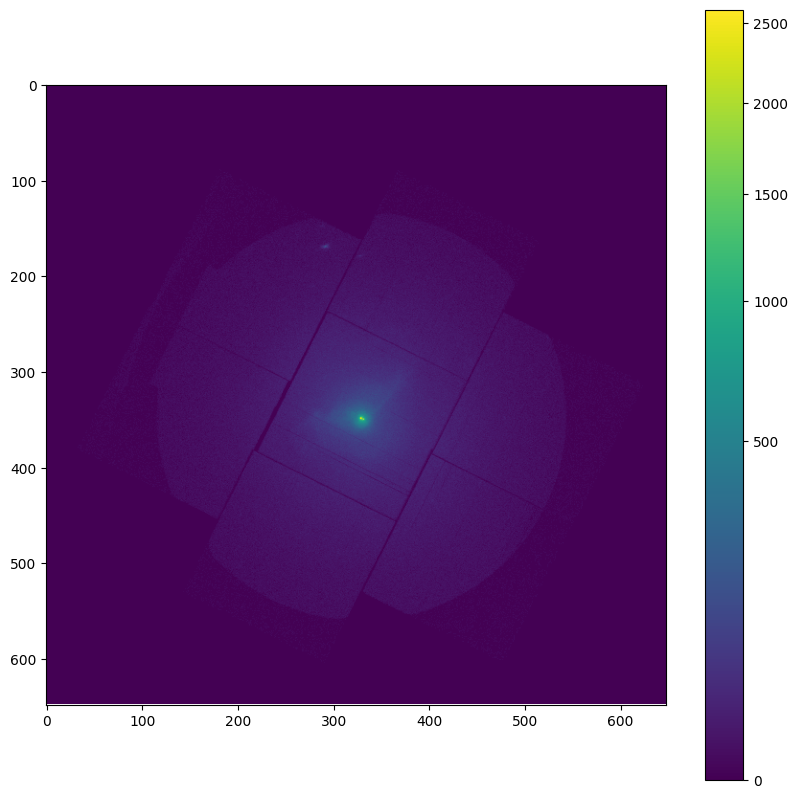

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

# 使用Astropy讀取上面FITS檔列表的其中一個影像檔案，並使用Matplotlib顯示影像，以PowerNorm來調整影像的顯示對比
with fits.open('./0114120101/pps/P0114120101M1U002IMAGE_8000.FTZ') as hdul:
  image_data = hdul[0].data

plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='viridis', norm=PowerNorm(gamma=0.5))
plt.colorbar()
plt.show()